In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.font_manager as fm
from textwrap import wrap


prop = fm.FontProperties(fname='../plots/arial.ttf')

plt.rcParams['ps.useafm'] = True
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

from statsmodels.stats.multitest import multipletests

import sys
import os

sys.path.append(os.path.relpath("../../huygens"))
sys.path.append(os.path.relpath("../../galileo"))
import galileo as gal
import huygens as huy

from itertools import combinations,chain
import upsetplot

import json

import helper

# Load rMATS outputs

In [3]:
with open("experiments.json","r") as f:
    exp = json.load(f)
    
    experiments = exp["experiments"]
    experiment_ids = exp["experiment_ids"]
    display_names = exp["display_names"]
    display_groups = exp["display_groups"]
    contexts = exp["contexts"]


In [4]:
rpl22_oe_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22_oe.h5",key="rmats")
rpl22l1_oe_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22l1_oe.h5",key="rmats")
rpl22l1_kd1_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22l1_kd1.h5",key="rmats")
rpl22l1_kd2_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22l1_kd2.h5",key="rmats")
rpl22_a_ko1_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22_a_ko1.h5",key="rmats")
rpl22_a_ko2_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22_a_ko2.h5",key="rmats")
rpl22_b_ko1_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22_b_ko1.h5",key="rmats")
rpl22_b_ko2_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22_b_ko2.h5",key="rmats")

rpl22_oe_rmats = rpl22_oe_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)
rpl22l1_oe_rmats = rpl22l1_oe_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)
rpl22l1_kd1_rmats = rpl22l1_kd1_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)
rpl22l1_kd2_rmats = rpl22l1_kd2_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)
rpl22_a_ko1_rmats = rpl22_a_ko1_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)
rpl22_a_ko2_rmats = rpl22_a_ko2_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)
rpl22_b_ko1_rmats = rpl22_b_ko1_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)
rpl22_b_ko2_rmats = rpl22_b_ko2_rmats.rename({"PValue":"pval","FDR":"qval"},axis=1)

splice_types = ["A3SS","A5SS","MXE","RI","SE"]

# Differential splicing

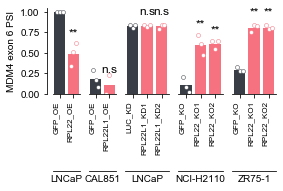

In [18]:
axes = helper.all_bars("MDM4_ENSG00000198625_204506557_204506625_204501318_204501374_204507336_204507436",
                       "splicing")

axes[0].set_ylim(0, 1.05)
axes[0].set_yticks([0,0.25,0.5,0.75,1.0])
axes[0].set_ylabel("MDM4 exon 6 PSI")

plt.savefig("../plots/MDM4_6_splicing.pdf",
            bbox_inches="tight", transparent=True)

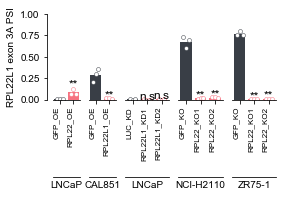

In [19]:
axes = helper.all_bars("RPL22L1_ENSG00000163584_170585801_170585990_170585801_170585923_170586086_170586176",
                       "splicing")

axes[0].set_ylim(0, 1)
axes[0].set_yticks([0,0.25,0.5,0.75,1.0])
axes[0].set_ylabel("RPL22L1 exon 3A PSI")

plt.savefig("../plots/RPL22L1_3A_splicing.pdf",
            bbox_inches="tight", transparent=True)

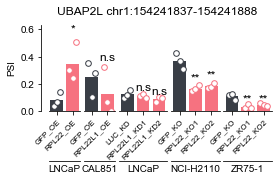

In [7]:
axes = helper.all_bars("UBAP2L_ENSG00000143569_154241837_154241888_154241232_154241430_154242675_154243040", 
     "splicing")

plt.suptitle("UBAP2L chr1:154241837-154241888")
plt.savefig("../plots/UBAP2L_splicing.pdf",bbox_inches="tight",transparent=True)

# Splicing types

In [104]:
def plot_splice_types(rmats_diffs, qval_cutoff=0.01, ax=None,legend=False):
    
    if ax is None:
        ax = plt.subplot(111)

    significants = rmats_diffs.copy(
        deep=True)[rmats_diffs["qval"] < qval_cutoff]

    significants["treatment_increase"] = significants["treatment_median"] > significants["control_median"]

    significants["treatment_increase"] = significants["treatment_increase"].replace({True: "Inclusion",
                                                                                     False: "Exclusion"})

    significants = significants.groupby(
        "splice_type")["treatment_increase"].value_counts()
    significants = significants.unstack()

    significants, _ = significants.align(
        pd.Series(index=splice_types), join="right", axis=0)
    significants = significants.fillna(0)

#     significants["splice_type"] = significants.index
    
#     significants.columns.name = ""

#     significants = pd.melt(significants,id_vars="splice_type")
#     significants = significants.set_index("splice_type")
    
#     display(significants)
    
    significants.T.plot.barh(stacked=True,ax=ax,legend=legend)
    
#     significants.plot.(y="splice_type",
#                       x="treatment_increase",
#                       kind="bar",
#                       cmap=mpl.colors.ListedColormap(
#                           ["#dbe2ef", "#3f72af"]),
#                       ax=ax,
#                       stacked=True,
#                       width=0.8,
#                       legend=legend
#                       )
    
    plt.ylabel("Frequency")
    ax.set_xlabel("")
    
    ax.set_xticklabels(["Inclusion","Exclusion"],rotation=45,ha="right")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_position(('axes', -0.05))

In [141]:
inclusion_events = pd.DataFrame(index=splice_types)
exclusion_events = pd.DataFrame(index=splice_types)

for experiment_idx, experiment in enumerate([rpl22_oe_rmats,
                                             rpl22l1_oe_rmats,
                                             rpl22l1_kd1_rmats,
                                             rpl22l1_kd1_rmats,
                                             rpl22_a_ko1_rmats,
                                             rpl22_a_ko2_rmats,
                                             rpl22_b_ko1_rmats,
                                             rpl22_b_ko2_rmats
                                            ]):
    
    experiment_name = display_names[experiment_idx]
    
    significants = experiment.copy(
        deep=True)[experiment["qval"] < 0.01]

    significants["treatment_increase"] = significants["treatment_median"] > significants["control_median"]

    significants["treatment_increase"] = significants["treatment_increase"].replace({True: "Inclusion",
                                                                                     False: "Exclusion"})
    significants = significants.groupby(
        "splice_type")["treatment_increase"].value_counts()
    significants = significants.unstack()
    
    inclusion_events[experiment_name] = significants["Inclusion"]
    exclusion_events[experiment_name] = significants["Exclusion"]
    
inclusion_events = inclusion_events.fillna(0)
exclusion_events = exclusion_events.fillna(0)

inclusion_events = inclusion_events[inclusion_events.columns[::-1]]
exclusion_events = exclusion_events[exclusion_events.columns[::-1]]

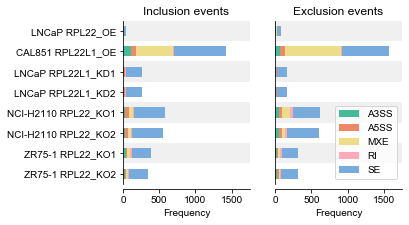

In [170]:
plt.figure(figsize=(5, 3))

splice_type_palette = mpl.colors.ListedColormap(
    [
        "#44bb99",
        "#ee8866",
        "#eedd88",
        "#ffaabb",
        "#77aadd"
    ]
)

ax = plt.subplot(121)

for i in np.arange(0, 8, 2)+0.5:
    ax.axhspan(i, i+1, facecolor='lightgrey', alpha=0.333)
    
inclusion_events.T.plot.barh(stacked=True,
                             ax=ax,
                             cmap=splice_type_palette,
                             legend=False
                             )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticks([0, 500, 1000, 1500])
ax.set_xlim(0, 1750)
ax.set_title("Inclusion events")
ax.set_xlabel("Frequency")

ax.spines["bottom"].set_position(('outward', 5))


ax = plt.subplot(122)

for i in np.arange(0, 8, 2)+0.5:
    ax.axhspan(i, i+1, facecolor='lightgrey', alpha=0.333)

exclusion_events.T.plot.barh(stacked=True,
                             ax=ax,
                             cmap=splice_type_palette,
                             )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_yticks([])
ax.set_xticks([0, 500, 1000, 1500])
ax.set_xlim(0, 1750)
ax.set_title("Exclusion events")
ax.set_xlabel("Frequency")

ax.spines["bottom"].set_position(('outward', 5))

plt.savefig("../plots/splice_types_summary.pdf",bbox_inches="tight",transparent=True)

# Overlaps

In [22]:
def get_overlaps(diffs, names, cutoff=0.01, direction=None, entity="exon", filter_empty=True):

    assert len(diffs) == len(names), "Length of diffs and names should match"

    n_diffs = len(diffs)
    all_subset_indices = list(
        chain(*[combinations(range(n_diffs), i) for i in range(1, n_diffs+1)]))

    significants = []

    for diff in diffs:

        if direction == None:

            significant = diff.copy(deep=True)[diff["qval"] < cutoff]

        if direction == "pos":

            significant = diff.copy(deep=True)[diff["qval"] < cutoff]
            significant = significant[significant["median_foldchange"] >= 1]

        elif direction == "neg":

            significant = diff.copy(deep=True)[diff["qval"] < cutoff]
            significant = significant[significant["median_foldchange"] < 1]

        if entity == "gene":

            significant_entities = set(significant["gene_id"])

        elif entity == "exon":

            significant_entities = set(significant.index)

        significants.append(significant_entities)

    intersections = []
    intersection_names = []

    for subset_indices in all_subset_indices:

        select_significants = set.intersection(
            *[significants[i] for i in subset_indices])

        if len(subset_indices) < n_diffs:

            select_insignificants = set.union(
                *[significants[i] for i in range(n_diffs) if i not in subset_indices])

            select_significants = select_significants - select_insignificants

        select_names = [names[i] for i in subset_indices]

        intersections.append(select_significants)
        intersection_names.append(select_names)

    intersection_sizes = [len(x) for x in intersections]

    if filter_empty:

        n_subsets = len(intersections)

        empty = [len(x) == 0 for x in intersections]

        intersections = [intersections[i]
                         for i in range(n_subsets) if not empty[i]]
        intersection_names = [intersection_names[i]
                              for i in range(n_subsets) if not empty[i]]
        intersection_sizes = [intersection_sizes[i]
                              for i in range(n_subsets) if not empty[i]]

    return intersections, intersection_names, intersection_sizes

# Intersections

In [32]:
rpl22_int_rmats = [
    rpl22_b_ko2_rmats,
    rpl22_b_ko1_rmats,
    rpl22_a_ko2_rmats,
    rpl22_a_ko1_rmats,
    rpl22_oe_rmats,
]

rpl22_int_display_names = [
    "ZR75-1 RPL22_KO2",
    "ZR75-1 RPL22_KO1",
    "NCI-H2110 RPL22_KO2",
    "NCI-H2110 RPL22_KO1",
    "LNCaP RPL22_OE"
]

rpl22_ko_ints, rpl22_ko_int_names, rpl22_ko_int_sizes = get_overlaps(rpl22_int_rmats,rpl22_int_display_names)

In [33]:
rpl22_ko_pivot = upsetplot.from_memberships(rpl22_ko_int_names,rpl22_ko_int_sizes)

rpl22_ko_pivot = rpl22_ko_pivot.reorder_levels(rpl22_int_display_names)

In [34]:
rpl22_ko_ints[-1]

{'MDM4_ENSG00000198625_204506557_204506625_204501318_204501374_204507336_204507436',
 'MDM4_ENSG00000198625_204506586_204506625_204501318_204501374_204507336_204507436',
 'RPL22L1_ENSG00000163584_170585801_170585990_170585801_170585923_170586086_170586176',
 'UBAP2L_ENSG00000143569_154241837_154241888_154241232_154241430_154242675_154243040'}

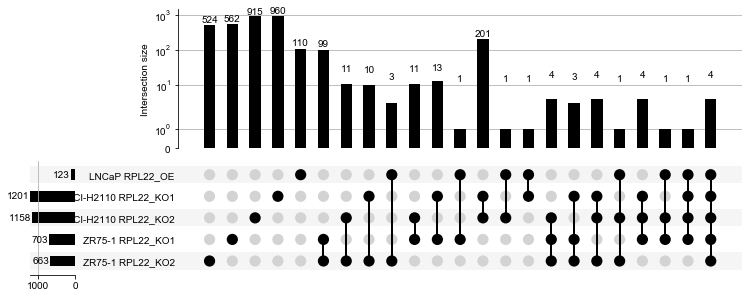

In [35]:
up = upsetplot.plot(rpl22_ko_pivot,
                    sort_categories_by=None, 
                    show_counts=True
                   )

up["intersections"].set_yscale("symlog")

plt.savefig("../plots/RPL22_exon_intersections.pdf",transparent=True,bbox_inches="tight")

In [29]:
rpl22l1_int_rmats = [
    rpl22l1_kd2_rmats,
    rpl22l1_kd1_rmats,
    rpl22l1_oe_rmats
]

rpl22l1_int_display_names = [
    "LNCaP RPL22L1_KD2",
    "LNCaP RPL22L1_KD1",
    "CAL851 RPL22L1_OE"
]

rpl22l1_ko_ints, rpl22l1_ko_int_names, rpl22l1_ko_int_sizes = get_overlaps(rpl22l1_int_rmats,rpl22l1_int_display_names)

In [30]:
rpl22l1_ko_pivot = upsetplot.from_memberships(rpl22l1_ko_int_names,rpl22l1_ko_int_sizes)

rpl22l1_ko_pivot = rpl22l1_ko_pivot.reorder_levels(rpl22l1_int_display_names)

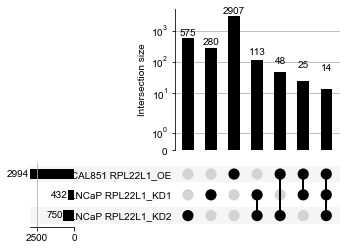

In [31]:
up = upsetplot.plot(rpl22l1_ko_pivot,
                    sort_categories_by=None, 
                    show_counts=True
                   )

up["intersections"].set_yscale("symlog")

plt.savefig("../plots/RPL22L1_exon_intersections.pdf",transparent=True,bbox_inches="tight")